In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
df = gpd.read_file("../data/spatial_data/kansas_rooftop_potential.gpkg")
armourdale = gpd.read_file("../data/spatial_data/armourdale_shape.gpkg")
lead = pd.read_csv("../data/armourdale_energy_expenses.csv", index_col='BLD')

In [33]:
combined = df.sjoin(armourdale, predicate='within')

In [19]:
combined.loc[:,'yearly_sunlight_kwh_total']/1e6

312    28.61974
Name: yearly_sunlight_kwh_total, dtype: float64

In [10]:
combined.loc[:,'kw_total'] # kW

312    22833.75
Name: kw_total, dtype: float64

<Axes: >

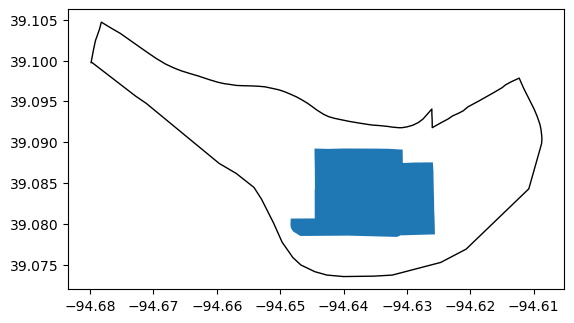

In [34]:
fig, ax = plt.subplots()
combined.plot(ax=ax)
armourdale.plot(ax=ax, fc='None', ec='k')

In [76]:

res_structures = pd.read_csv("../data/residential_buildings.csv", index_col=0)
res_elec_load = pd.read_csv("../data/timeseries/residential_elec_load.csv", parse_dates=True, index_col='timestamp')
res_heat_load = pd.read_csv("../data/timeseries/residential_heat_load.csv", parse_dates=True, index_col='timestamp')

total_elec_load = res_elec_load*res_structures.T.loc['n_units']
total_heat_load = res_heat_load*res_structures.T.loc['n_units']

In [82]:
electricity_price = 0.1129

In [86]:
res_elec_load.columns.map(lead['ELEP*UNITS'])/electricity_price

Index([ 10973.01188612464,  6058.058224311011, 14042.677596446287,
       15966.966005418804,  5035.694118660718],
      dtype='float64')

In [98]:
res_structures

,n_units
multi-family_with_2_-_4_units,191.0
multi-family_with_5plus_units,6.0
single-family_attached,16.0
single-family_detached,886.0
mobile_home,8.0


In [101]:
rescaled_elec_load = (res_elec_load.div(res_elec_load.sum(),axis=1)*
                      (res_elec_load.columns.map(lead['ELEP*UNITS'])/electricity_price)*
                      res_structures.T.loc['n_units'])

In [110]:
combined.at[312,'yearly_sunlight_kwh_total']/rescaled_elec_load.resample('h').mean().sum().sum()

6.918441588455463

In [114]:
combined.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count', 'geometry',
       'index_right', 'CITY', 'WARD'],
      dtype='object')

In [35]:
combined.percent_qualified

312    62.810559
Name: percent_qualified, dtype: float64

In [22]:
weather = pd.read_csv("../data/timeseries/weather_year.csv", parse_dates=True, index_col=0)
weather.head()

,date_time,temp_db,rel_humidity,wind_speed,wind_direction,ghi,dni,dhi
2018-01-01 00:00:00,2005-01-01 01:00:00,8.0,61,5.7,80,0,0,0
2018-01-01 01:00:00,2005-01-01 02:00:00,8.0,57,5.1,90,0,0,0
2018-01-01 02:00:00,2005-01-01 03:00:00,8.0,57,5.1,90,0,0,0
2018-01-01 03:00:00,2005-01-01 04:00:00,7.0,56,6.2,80,0,0,0
2018-01-01 04:00:00,2005-01-01 05:00:00,7.0,56,5.1,90,0,0,0


In [23]:
weather['ghi'].max()

982

In [25]:
(weather['ghi'] / weather['ghi'].max() * 22833.75).sum()/1e6

33.63955478615071

In [20]:
total_elec_load.resample('h').mean().resample('ME').sum().loc['2018'].sum().sum()

3399638.8051750576

In [55]:
(res_elec_load.loc[:, 'single-family_detached'].to_frame()/47699.807).resample('h').mean().resample('ME').sum().sum()*886

single-family_detached    2.872939e+06
dtype: float64

In [63]:
res_elec_load.resample('h').mean().resample('ME').sum().loc['2018'].sum() * 0.10714

multi-family_with_2_-_4_units    254.733880
multi-family_with_5plus_units    227.087262
single-family_attached           241.053293
single-family_detached           347.351145
mobile_home                      326.329977
dtype: float64

<Axes: title={'center': 'Monthly Building Energy \n ResStock'}, ylabel='kWh'>

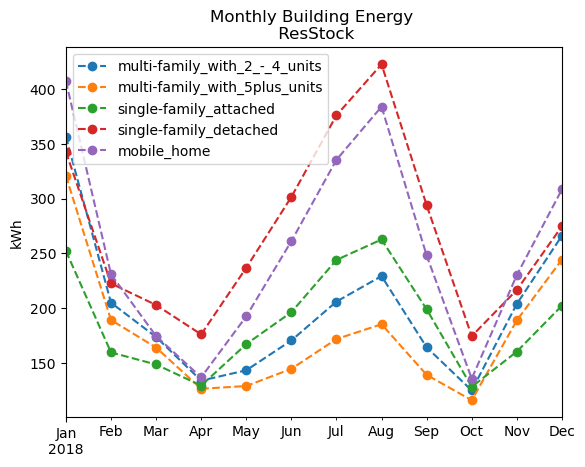

In [69]:
res_elec_load.resample('h').mean().resample('ME').sum().loc['2018'].plot(marker='o', linestyle='--', xlabel='', ylabel='kWh', title='Monthly Building Energy \n ResStock')

In [58]:
res_elec_load.resample('h').mean().resample('ME').sum().loc['2018'] * 0.10714 + (22/12)

,multi-family_with_2_-_4_units,multi-family_with_5plus_units,single-family_attached,single-family_detached,mobile_home
timestamp,,,,,
2018-01-31,40.044137,36.222490,28.861290,38.560354,45.482042
2018-02-28,23.800901,22.107862,18.935128,25.684372,26.586742
2018-03-31,20.441317,19.408657,17.751216,23.574588,20.531207
2018-04-30,16.173697,15.372410,15.683319,20.697393,16.495946
2018-05-31,17.182721,15.646410,19.744576,27.220587,22.465727
2018-06-30,20.103903,17.323828,22.867785,34.144244,29.819897
2018-07-31,23.905924,20.240604,27.984748,42.135665,37.782434
2018-08-31,26.406142,21.691362,29.986353,47.135824,42.987269
2018-09-30,19.434027,16.739112,23.157401,33.345445,28.425835


In [47]:
(6466+4248)/1e5

0.10714